In [59]:
import torch
import numpy as np
from torch.autograd import Variable
import torchvision
from torchvision import transforms, models
import matplotlib.pyplot as plt
import os
# os.chdir('./input')

In [4]:
import cv2

In [3]:
import scipy.misc

In [8]:
os.listdir('all_train/wrong')

['all_xml.csv',
 'J01_2018.06.13 13_17_04.jpg',
 'J01_2018.06.13 13_19_45.jpg',
 'J01_2018.06.13 13_25_43.jpg',
 'J01_2018.06.13 13_31_01.jpg',
 'J01_2018.06.13 13_33_53.jpg',
 'J01_2018.06.13 13_35_29.jpg',
 'J01_2018.06.13 13_43_44.jpg',
 'J01_2018.06.13 13_44_46.jpg',
 'J01_2018.06.13 13_48_07.jpg',
 'J01_2018.06.13 13_50_00.jpg',
 'J01_2018.06.13 13_52_56.jpg',
 'J01_2018.06.13 13_53_54.jpg',
 'J01_2018.06.13 13_55_55.jpg',
 'J01_2018.06.13 13_58_14.jpg',
 'J01_2018.06.13 14_05_24.jpg',
 'J01_2018.06.13 14_08_09.jpg',
 'J01_2018.06.13 14_09_06.jpg',
 'J01_2018.06.13 14_10_24.jpg',
 'J01_2018.06.13 14_12_05.jpg',
 'J01_2018.06.13 14_20_28.jpg',
 'J01_2018.06.13 14_30_18.jpg',
 'J01_2018.06.13 14_39_40.jpg',
 'J01_2018.06.13 14_41_19.jpg',
 'J01_2018.06.13 14_42_43.jpg',
 'J01_2018.06.13 14_45_45.jpg',
 'J01_2018.06.13 14_49_38.jpg',
 'J01_2018.06.13 14_56_32.jpg',
 'J01_2018.06.16 08_47_24.jpg',
 'J01_2018.06.16 08_49_07.jpg',
 'J01_2018.06.16 08_54_07.jpg',
 'J01_2018.06.16 08_57_2

In [10]:
a = cv2.imread('all_train/wrong/J01_2018.06.13 13_17_04.jpg')
a.shape

(1920, 2560, 3)

In [11]:
from PIL import Image

In [15]:
b = Image.open('all_train/wrong/J01_2018.06.13 13_17_04.jpg')
type(b)

PIL.JpegImagePlugin.JpegImageFile

In [18]:
a_resize = cv2.resize(a, (224, 224), cv2.INTER_AREA)
a_resize.shape
cv2.

(224, 224, 3)

In [ ]:
scipy.misc.imresize()

In [4]:
transformer = transforms.Compose([
                                  transforms.Resize((224, 224)),
                                  # transforms.CenterCrop(200),
                                  transforms.ToTensor(),
                                  transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
# train_data = {}
train_data = {x:torchvision.datasets.ImageFolder(x, transform=transformer)
              for x in ['train', 'val']}
train_loader = {x:torch.utils.data.DataLoader(train_data[x],
                                               batch_size=4,
                                               shuffle=True)
                for x in ['train', 'val']}

print('train num is ' + str(len(train_data['train'])))
print('val num is ' + str(len(train_data['val'])))

train num is 1822
val num is 200


In [11]:
model = models.vgg16(pretrained=True)
# print(model)
model.classifier = torch.nn.Sequential(
    torch.nn.Linear(25088, 4096),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(4096, 4096),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(4096, 2)
)
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
# print(model)

In [11]:
for x, y in train_data['train']:
    print(x.shape)
    fig = plt.figire(figsize = [10, 10])
    plt.imshow(x[0, :, :])
    plt.show()
#     break

torch.Size([3, 224, 224])


AttributeError: module 'matplotlib.pyplot' has no attribute 'figire'

In [ ]:
epochs = 2
for epoch in range(epochs):
    batch = 0
    epoch_loss = 0
    correct = 0
    # print(train_loader['train'])
    for data in train_loader['train']:
        batch += 1
        # print(data)
        x, y = data
        x, y = Variable(x), Variable(y)
        y_out = model(x)
        optimizer.zero_grad()
        loss = loss_func(y_out, y)
        epoch_loss += loss
        # print(loss.data)
        # print(loss.data[0])
        loss.backward()
        optimizer.step()

        y_pre = torch.argmax(y_out, 1)
        bool_arr = y_pre.data.numpy() == y.data.numpy()
        # print(np.sum(.astype(y_pre.data.numpy() == y.data.numpy(), np.float32)))
        correct_temp = np.sum((bool_arr.astype(np.int32)))
        # correct_temp = np.sum(np.astype(y_pre.data.numpy() == y.data.numpy(), np.int32))
        correct += correct_temp
        # print(correct)
        # print(4*batch)
        # if batch % 25 == 0:
        print('acc = ' + str((correct / (4*batch)) * 100)[:4] + '%' + '  epoch = ' + str(epoch) + '  batch = ' + str(batch))

In [14]:
import pandas as pd

In [31]:
df = pd.read_csv('submission1.csv')

In [32]:
df.describe()

,probability
count,662.000000
mean,0.363313
std,0.427753
min,0.000001
25%,0.015496
50%,0.070113
75%,0.956774
max,1.000000


In [33]:
df.dtypes

filename        object
probability    float64
dtype: object

In [34]:
df['probability'].dtypes

dtype('float64')

In [55]:
df.loc[df['probability'] == 0.99999998000000001, 'probability'] = 0.99999998

In [36]:
sum(df['probability'] == 1)

0

In [48]:
df.iloc[0, 1]

0.99999998000000001

In [51]:
df.iloc[3, 1]

0.99999998000000001

In [54]:
df.loc[:, 'probability'] == 0.99999998000000001

0       True
1      False
2      False
3       True
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11     False
12      True
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21      True
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
632    False
633    False
634     True
635    False
636     True
637    False
638    False
639     True
640    False
641    False
642    False
643    False
644     True
645    False
646    False
647    False
648    False
649    False
650    False
651    False
652    False
653    False
654    False
655    False
656    False
657    False
658     True
659    False
660    False
661    False
Name: probability, Length: 662, dtype: bool

In [52]:
df.iloc[3, 1] == 0.99999998000000001

True

In [66]:
df.to_csv('submission2.csv', index=False)

In [64]:
df.round(6)

,filename,probability
0,J01_2018.06.13 13_22_11.jpg,1.000000
1,J01_2018.06.13 13_29_45.jpg,0.999988
2,J01_2018.06.13 13_43_25.jpg,0.959185
3,J01_2018.06.13 13_51_57.jpg,1.000000
4,J01_2018.06.13 13_54_49.jpg,0.999998
5,J01_2018.06.13 14_01_56.jpg,1.000000
6,J01_2018.06.13 14_02_18.jpg,0.010188
7,J01_2018.06.13 14_05_34.jpg,0.923019
8,J01_2018.06.13 14_09_19.jpg,0.298232
9,J01_2018.06.13 14_17_26.jpg,0.986350


In [63]:
df.iloc[0, 1].round(8)

0.99999998000000001

In [5]:
train_data['val']

Dataset ImageFolder
    Number of datapoints: 200
    Root Location: val
    Transforms (if any): Compose(
                             Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                             Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
                         )
    Target Transforms (if any): None

In [11]:
model = torch.load('models/my_model.pkl', map_location=lambda storage, loc: storage)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [12]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(

In [16]:
next(iter(train_loader['train']))

[tensor([[[[-0.5216, -0.5137, -0.5294,  ..., -0.2392, -0.2000, -0.1765],
           [-0.5137, -0.5137, -0.5216,  ..., -0.2549, -0.2314, -0.2078],
           [-0.5137, -0.5137, -0.5137,  ..., -0.2627, -0.2392, -0.2235],
           ...,
           [-0.2784, -0.2549, -0.2941,  ..., -0.0275, -0.0196, -0.0196],
           [-0.2627, -0.2471, -0.2549,  ...,  0.0039,  0.0275,  0.0196],
           [-0.2549, -0.2784, -0.2706,  ...,  0.0275,  0.0510,  0.0667]],
 
          [[-0.5216, -0.5137, -0.5216,  ..., -0.2392, -0.2000, -0.1765],
           [-0.5137, -0.5137, -0.5137,  ..., -0.2549, -0.2314, -0.2078],
           [-0.5137, -0.5137, -0.5137,  ..., -0.2627, -0.2392, -0.2235],
           ...,
           [-0.2784, -0.2549, -0.2941,  ..., -0.0275, -0.0196, -0.0196],
           [-0.2627, -0.2471, -0.2549,  ...,  0.0039,  0.0275,  0.0196],
           [-0.2549, -0.2784, -0.2706,  ...,  0.0275,  0.0510,  0.0667]],
 
          [[-0.5216, -0.5137, -0.5216,  ..., -0.2392, -0.2000, -0.1765],
           [-

In [13]:
next(iter(train_data['train']))

(tensor([[[-0.3176, -0.2627, -0.2549,  ...,  0.1529,  0.1529,  0.1529],
          [-0.3176, -0.2706, -0.2706,  ...,  0.1451,  0.1451,  0.1451],
          [-0.3176, -0.3176, -0.3098,  ...,  0.1216,  0.1137,  0.1294],
          ...,
          [-0.2157, -0.2000, -0.1843,  ...,  0.2000,  0.2000,  0.2314],
          [-0.2000, -0.2078, -0.2000,  ...,  0.2235,  0.2314,  0.2941],
          [-0.1922, -0.2157, -0.2000,  ...,  0.1922,  0.1922,  0.2392]],
 
         [[-0.4667, -0.4980, -0.5059,  ..., -0.1686, -0.1686, -0.1686],
          [-0.4667, -0.4902, -0.4980,  ..., -0.1686, -0.1686, -0.1686],
          [-0.4667, -0.4667, -0.4667,  ..., -0.1529, -0.1529, -0.1608],
          ...,
          [-0.4039, -0.3882, -0.3725,  ..., -0.0588, -0.0588, -0.0275],
          [-0.3882, -0.3961, -0.3882,  ..., -0.0353, -0.0275,  0.0353],
          [-0.3804, -0.4039, -0.3882,  ..., -0.0667, -0.0667, -0.0196]],
 
         [[-0.4196, -0.4196, -0.4196,  ..., -0.0588, -0.0588, -0.0588],
          [-0.4196, -0.4196,

In [5]:
test_imgs = torchvision.datasets.ImageFolder('test_imgs', transform=transformer)

In [7]:
x, y = next(iter(test_imgs))

In [8]:
x.shape

torch.Size([3, 224, 224])

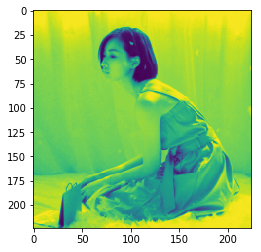

In [9]:
plt.imshow(x[0, :, :])
plt.show()

In [ ]:
type(ret)

In [15]:
model.features[1]

ReLU(inplace)

In [34]:
ret = model.features(x.reshape(1, 3, 224, 224))
ret = ret.data.numpy()
ret.shape

(1, 512, 7, 7)

In [16]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

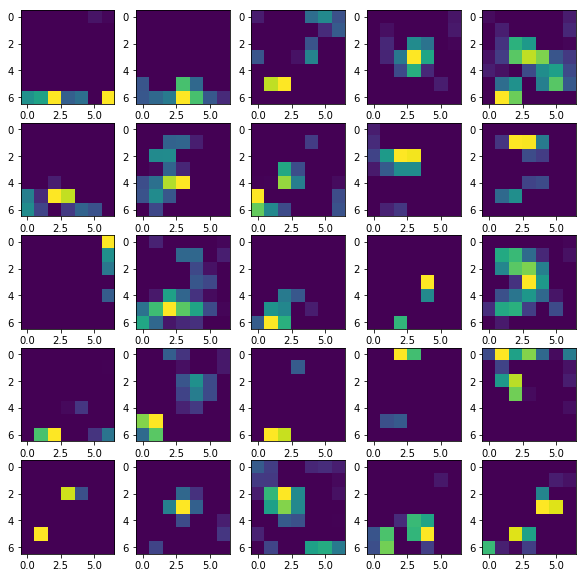

In [36]:
fig, ax = plt.subplots(5, 5, figsize=[10, 10])
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(ret[0, i*20 + j, :, :])
plt.show()

In [33]:
class DecoderBlock(nn.Module):
    def __init__(self, in_channels, middle_channels, out_channels):
        super().__init__()

        self.block = nn.Sequential(
            ConvRelu(in_channels, middle_channels),
            nn.ConvTranspose2d(middle_channels, out_channels, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.block(x)

In [30]:
from torch import nn

In [48]:
model.features[0]

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [98]:
class UNet11(nn.Module):
    def __init__(self, num_filters=32, pretrained=False):
        """
        :param num_classes:
        :param num_filters:
        :param pretrained:
            False - no pre-trained network is used
            True  - encoder is pre-trained with VGG11
        """
        super().__init__()
#         self.pool = nn.MaxPool2d(2, 2)

#         self.encoder = models.vgg11(pretrained=pretrained).features

#         self.relu = model.features[0]
        self.conv0 = model.features[0]
        self.conv1 = model.features[1]
        self.conv2 = model.features[2]
        self.conv3s = model.features[3]
        self.conv3 = model.features[4]
        self.conv4s = model.features[5]
        self.conv4 = model.features[6]
#         self.conv5s = self.encoder[16]
#         self.conv5 = self.encoder[18]

    def forward(self, x):
        conv0 = self.conv0(x)
#         conv1 = self.conv1(conv0)
        conv1 = conv0
        conv2 = self.conv2(conv1)
        conv3s = self.conv3s(conv2)
        conv3 = self.conv3(conv3s)
        conv4s = self.conv4s(conv3)
        conv4 = self.conv4(conv4s)
        return conv2
#         return conv5
net = UNet11()
print(net)
ret = net(x.reshape(1, 3, 224, 224))
ret = ret.data.numpy()
print(ret[0, 4, 0, :10])
ret.shape

UNet11(
  (conv0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1): ReLU(inplace)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3s): ReLU(inplace)
  (conv3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4s): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): ReLU(inplace)
)
[ 5.37970829  1.88785374  1.82467151  1.83200765  1.82148194  1.82802224
  1.81536901  1.79969764  1.80951297  1.82188618]


(1, 64, 224, 224)

In [ ]:
[ 3.51779366  1.93368053  1.17235816  1.18535006  1.18095827  1.18298173
  1.17534101  1.15856016  1.16224301  1.17436039]

In [82]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [22]:
224/32

7.0

In [ ]:
class UNet11(nn.Module):
    def __init__(self, num_filters=32, pretrained=False):
        """
        :param num_classes:
        :param num_filters:
        :param pretrained:
            False - no pre-trained network is used
            True  - encoder is pre-trained with VGG11
        """
        super().__init__()

        self.encoder = models.vgg11(pretrained=pretrained).features
        self.block1= torch.nn.Sequential(
            self.encoder[0],
            self.encoder[1],
            self.encoder[2]
        )
        self.block2 = torch.nn.Sequential
            self.encoder[3],
            self.encoder[4],
            self.encoder[5],
            self.encoder[6],
            self.encoder[7],
        self.encoder[8],
        self.encoder[9],
        self.encoder[10],
        self.encoder[11],
        self.encoder[12],
        self.encoder[13]
        self.encoder[0],
        self.encoder[0],
        self.encoder[0],
        self.encoder[0],
        self.encoder[0],
        self.encoder[0],)

        
    def forward(self, x):
        conv0 = self.conv0(x)
        conv1 = self.conv1(conv0)
        conv2 = self.conv2(conv1)
        conv3s = self.conv3s(conv2)
        conv3 = self.conv3(conv3s)
        conv4s = self.conv4s(conv3)
        conv4 = self.conv4(conv4s)
        return conv3s
#         return conv5

In [76]:
net = UNet11(pretrained=True)

In [77]:
net

UNet11(
  (conv0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1): ReLU(inplace)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3s): ReLU(inplace)
  (conv3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4s): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): ReLU(inplace)
)

In [78]:
x.shape

torch.Size([3, 224, 224])

In [79]:
ret = net(x.reshape(1, 3, 224, 224))
ret = ret.data.numpy()
ret.shape

(1, 64, 224, 224)

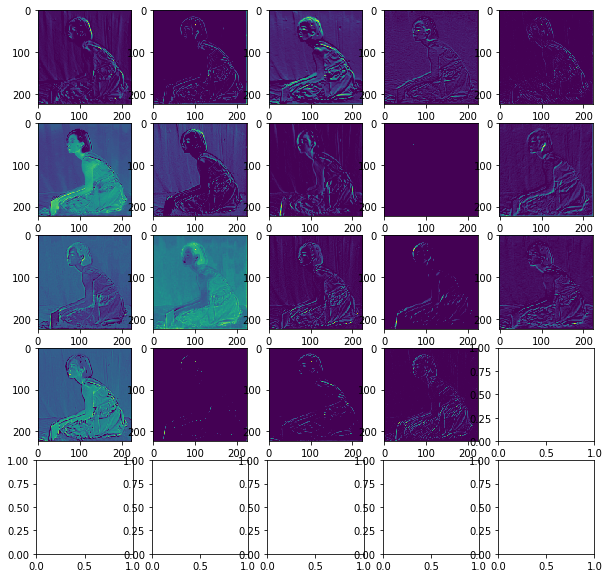

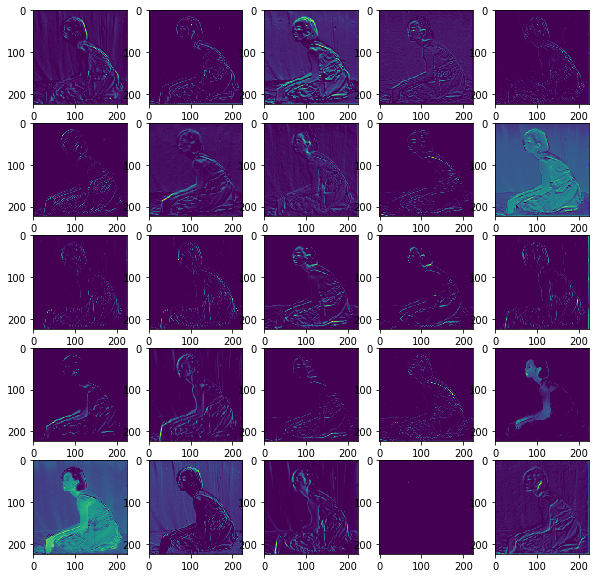

In [81]:
fig, ax = plt.subplots(5, 5, figsize=[10, 10])
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(ret[0, i*5 + j, :, :])
plt.show()

In [39]:
def conv3x3(in_, out):
    return nn.Conv2d(in_, out, 3, padding=1)


class ConvRelu(nn.Module):
    def __init__(self, in_, out):
        super().__init__()
        self.conv = conv3x3(in_, out)
        self.activation = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.activation(x)
        return x


class DecoderBlock(nn.Module):
    def __init__(self, in_channels, middle_channels, out_channels):
        super().__init__()

        self.block = nn.Sequential(
            ConvRelu(in_channels, middle_channels),
            nn.ConvTranspose2d(middle_channels, out_channels, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.block(x)


class UNet11(nn.Module):
    def __init__(self, num_filters=32, pretrained=False):
        """
        :param num_classes:
        :param num_filters:
        :param pretrained:
            False - no pre-trained network is used
            True  - encoder is pre-trained with VGG11
        """
        super().__init__()
        self.pool = nn.MaxPool2d(2, 2)

        self.encoder = models.vgg11(pretrained=pretrained).features

        self.relu = self.encoder[1]
        self.conv1 = self.encoder[0]
        self.conv2 = self.encoder[3]
        self.conv3s = self.encoder[6]
        self.conv3 = self.encoder[8]
        self.conv4s = self.encoder[11]
        self.conv4 = self.encoder[13]
        self.conv5s = self.encoder[16]
        self.conv5 = self.encoder[18]

        self.center = DecoderBlock(num_filters * 8 * 2, num_filters * 8 * 2, num_filters * 8)
        self.dec5 = DecoderBlock(num_filters * (16 + 8), num_filters * 8 * 2, num_filters * 8)
        self.dec4 = DecoderBlock(num_filters * (16 + 8), num_filters * 8 * 2, num_filters * 4)
        self.dec3 = DecoderBlock(num_filters * (8 + 4), num_filters * 4 * 2, num_filters * 2)
        self.dec2 = DecoderBlock(num_filters * (4 + 2), num_filters * 2 * 2, num_filters)
        self.dec1 = ConvRelu(num_filters * (2 + 1), num_filters)

        self.final = nn.Conv2d(num_filters, 1, kernel_size=1)

    def forward(self, x):
        conv1 = self.relu(self.conv1(x))
        conv2 = self.relu(self.conv2(self.pool(conv1)))
        conv3s = self.relu(self.conv3s(self.pool(conv2)))
        conv3 = self.relu(self.conv3(conv3s))
        conv4s = self.relu(self.conv4s(self.pool(conv3)))
        conv4 = self.relu(self.conv4(conv4s))
        conv5s = self.relu(self.conv5s(self.pool(conv4)))
        conv5 = self.relu(self.conv5(conv5s))

        center = self.center(self.pool(conv5))

        dec5 = self.dec5(torch.cat([center, conv5], 1))
        dec4 = self.dec4(torch.cat([dec5, conv4], 1))
        dec3 = self.dec3(torch.cat([dec4, conv3], 1))
        dec2 = self.dec2(torch.cat([dec3, conv2], 1))
        dec1 = self.dec1(torch.cat([dec2, conv1], 1))
        return self.final(dec1)


def unet11(pretrained=False, **kwargs):
    """
    pretrained:
            False - no pre-trained network is used
            True  - encoder is pre-trained with VGG11
            carvana - all weights are pre-trained on
                Kaggle: Carvana dataset https://www.kaggle.com/c/carvana-image-masking-challenge
    """
    model = UNet11(pretrained=pretrained, **kwargs)

    if pretrained == 'carvana':
        state = torch.load('TernausNet.pt')
        model.load_state_dict(state['model'])
    return model


class DecoderBlockV2(nn.Module):
    def __init__(self, in_channels, middle_channels, out_channels, is_deconv=True):
        super(DecoderBlockV2, self).__init__()
        self.in_channels = in_channels

        if is_deconv:
            """
                Paramaters for Deconvolution were chosen to avoid artifacts, following
                link https://distill.pub/2016/deconv-checkerboard/
            """

            self.block = nn.Sequential(
                ConvRelu(in_channels, middle_channels),
                nn.ConvTranspose2d(middle_channels, out_channels, kernel_size=4, stride=2,
                                   padding=1),
                nn.ReLU(inplace=True)
            )
        else:
            self.block = nn.Sequential(
                nn.Upsample(scale_factor=2, mode='bilinear'),
                ConvRelu(in_channels, middle_channels),
                ConvRelu(middle_channels, out_channels),
            )

    def forward(self, x):
        return self.block(x)

In [14]:
a = torch.rand(1,4)
a

tensor([[ 0.3996,  0.6594,  0.6349,  0.0855]])

In [18]:
ret = a[:, 2:] - a[:, :2]
print(ret.shape)
ret

torch.Size([1, 2])


tensor([[ 0.2353, -0.5739]])

In [19]:
ret[0]

tensor([ 0.2353, -0.5739])

In [20]:
ret[1]

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [63]:
import math
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo
from torch.nn import init
import torch

__all__ = ['xception']

model_urls = {
    'xception':'https://www.dropbox.com/s/7tk94lexs1jyd63/xception-5a75839e.pth.tar?dl=1'
}


class SeparableConv2d(nn.Module):
    def __init__(self,in_channels,out_channels,kernel_size=1,stride=1,padding=0,dilation=1,bias=False):
        super(SeparableConv2d,self).__init__()

        self.conv1 = nn.Conv2d(in_channels,in_channels,kernel_size,stride,padding,dilation,groups=in_channels,bias=bias)
        self.pointwise = nn.Conv2d(in_channels,out_channels,1,1,0,1,1,bias=bias)
    
    def forward(self,x):
        x = self.conv1(x)
        x = self.pointwise(x)
        return x


class Block(nn.Module):
    def __init__(self,in_filters,out_filters,reps,strides=1,start_with_relu=True,grow_first=True):
        super(Block, self).__init__()

        if out_filters != in_filters or strides!=1:
            self.skip = nn.Conv2d(in_filters,out_filters,1,stride=strides, bias=False)
            self.skipbn = nn.BatchNorm2d(out_filters)
        else:
            self.skip=None
        
        self.relu = nn.ReLU(inplace=True)
        rep=[]

        filters=in_filters
        if grow_first:
            rep.append(self.relu)
            rep.append(SeparableConv2d(in_filters,out_filters,3,stride=1,padding=1,bias=False))
            rep.append(nn.BatchNorm2d(out_filters))
            filters = out_filters

        for i in range(reps-1):
            rep.append(self.relu)
            rep.append(SeparableConv2d(filters,filters,3,stride=1,padding=1,bias=False))
            rep.append(nn.BatchNorm2d(filters))
        
        if not grow_first:
            rep.append(self.relu)
            rep.append(SeparableConv2d(in_filters,out_filters,3,stride=1,padding=1,bias=False))
            rep.append(nn.BatchNorm2d(out_filters))

        if not start_with_relu:
            rep = rep[1:]
        else:
            rep[0] = nn.ReLU(inplace=False)

        if strides != 1:
            rep.append(nn.MaxPool2d(3,strides,1))
        self.rep = nn.Sequential(*rep)

    def forward(self,inp):
        x = self.rep(inp)

        if self.skip is not None:
            skip = self.skip(inp)
            skip = self.skipbn(skip)
        else:
            skip = inp

        x+=skip
        return x



class Xception(nn.Module):
    """
    Xception optimized for the ImageNet dataset, as specified in
    https://arxiv.org/pdf/1610.02357.pdf
    """
    def __init__(self, num_classes=1000):
        """ Constructor
        Args:
            num_classes: number of classes
        """
        super(Xception, self).__init__()

        
        self.num_classes = num_classes

        self.conv1 = nn.Conv2d(3, 32, 3,2, 0, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv2d(32,64,3,bias=False)
        self.bn2 = nn.BatchNorm2d(64)
        #do relu here

        self.block1=Block(64,128,2,2,start_with_relu=False,grow_first=True)
        self.block2=Block(128,256,2,2,start_with_relu=True,grow_first=True)
        self.block3=Block(256,728,2,2,start_with_relu=True,grow_first=True)

        self.block4=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block5=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block6=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block7=Block(728,728,3,1,start_with_relu=True,grow_first=True)

        self.block8=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block9=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block10=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block11=Block(728,728,3,1,start_with_relu=True,grow_first=True)

        self.block12=Block(728,1024,2,2,start_with_relu=True,grow_first=False)

        self.conv3 = SeparableConv2d(1024,1536,3,1,1)
        self.bn3 = nn.BatchNorm2d(1536)

        #do relu here
        self.conv4 = SeparableConv2d(1536,2048,3,1,1)
        self.bn4 = nn.BatchNorm2d(2048)

        self.fc = nn.Linear(2048, num_classes)



        #------- init weights --------
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
        #-----------------------------





    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        x = self.block6(x)
        x = self.block7(x)
        x = self.block8(x)
        x = self.block9(x)
        x = self.block10(x)
        x = self.block11(x)
        x = self.block12(x)
        
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        
        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu(x)

        x = F.adaptive_avg_pool2d(x, (1, 1))
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x



def xception1(pretrained=False,**kwargs):
    """
    Construct Xception.
    """

    model = Xception(**kwargs)
    for i in model.parameters():
        print(i.shape)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['xception'])['state_dict'])
    return model

In [64]:
model = xception1()
model

torch.Size([32, 3, 3, 3])
torch.Size([32])
torch.Size([32])
torch.Size([64, 32, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([128, 64, 1, 1])
torch.Size([128])
torch.Size([128])
torch.Size([64, 1, 3, 3])
torch.Size([128, 64, 1, 1])
torch.Size([128])
torch.Size([128])
torch.Size([128, 1, 3, 3])
torch.Size([128, 128, 1, 1])
torch.Size([128])
torch.Size([128])
torch.Size([256, 128, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([128, 1, 3, 3])
torch.Size([256, 128, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([256, 1, 3, 3])
torch.Size([256, 256, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([728, 256, 1, 1])
torch.Size([728])
torch.Size([728])
torch.Size([256, 1, 3, 3])
torch.Size([728, 256, 1, 1])
torch.Size([728])
torch.Size([728])
torch.Size([728, 1, 3, 3])
torch.Size([728, 728, 1, 1])
torch.Size([728])
torch.Size([728])
torch.Size([728, 1, 3, 3])
torch.Size([728, 728, 1, 1])
torch.Size([728])
torch.Size([728])
torch.Size([728, 1, 3, 3])
torch.Size([728,

Xception(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (block1): Block(
    (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (rep): Sequential(
      (0): SeparableConv2d(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): SeparableConv2d(
        (conv1): Conv2d(128, 128, 

In [35]:
""" 
Ported to pytorch thanks to [tstandley](https://github.com/tstandley/Xception-PyTorch)

@author: tstandley
Adapted by cadene

Creates an Xception Model as defined in:

Francois Chollet
Xception: Deep Learning with Depthwise Separable Convolutions
https://arxiv.org/pdf/1610.02357.pdf

This weights ported from the Keras implementation. Achieves the following performance on the validation set:

Loss:0.9173 Prec@1:78.892 Prec@5:94.292

REMEMBER to set your image size to 3x299x299 for both test and validation

normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                  std=[0.5, 0.5, 0.5])

The resize parameter of the validation transform should be 333, and make sure to center crop at 299x299
"""
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo
from torch.nn import init

__all__ = ['xception']

pretrained_settings = {
    'xception': {
        'imagenet': {
            'url': 'http://data.lip6.fr/cadene/pretrainedmodels/xception-b5690688.pth',
            'input_space': 'RGB',
            'input_size': [3, 299, 299],
            'input_range': [0, 1],
            'mean': [0.5, 0.5, 0.5],
            'std': [0.5, 0.5, 0.5],
            'num_classes': 1000,
            'scale': 0.8975 # The resize parameter of the validation transform should be 333, and make sure to center crop at 299x299
        }
    }
}

In [39]:
settings = pretrained_settings['xception']['imagenet']

In [53]:
class SeparableConv2d(nn.Module):
    def __init__(self,in_channels,out_channels,kernel_size=1,stride=1,padding=0,dilation=1,bias=False):
        super(SeparableConv2d,self).__init__()

        self.conv1 = nn.Conv2d(in_channels,in_channels,kernel_size,stride,padding,dilation,groups=in_channels,bias=bias)
        self.pointwise = nn.Conv2d(in_channels,out_channels,1,1,0,1,1,bias=bias)
    
    def forward(self,x):
        x = self.conv1(x)
        x = self.pointwise(x)
        return x


class Block(nn.Module):
    def __init__(self,in_filters,out_filters,reps,strides=1,start_with_relu=True,grow_first=True):
        super(Block, self).__init__()

        if out_filters != in_filters or strides!=1:
            self.skip = nn.Conv2d(in_filters,out_filters,1,stride=strides, bias=False)
            self.skipbn = nn.BatchNorm2d(out_filters)
        else:
            self.skip=None
        
        self.relu = nn.ReLU(inplace=True)
        rep=[]

        filters=in_filters
        if grow_first:
            rep.append(self.relu)
            rep.append(SeparableConv2d(in_filters,out_filters,3,stride=1,padding=1,bias=False))
            rep.append(nn.BatchNorm2d(out_filters))
            filters = out_filters

        for i in range(reps-1):
            rep.append(self.relu)
            rep.append(SeparableConv2d(filters,filters,3,stride=1,padding=1,bias=False))
            rep.append(nn.BatchNorm2d(filters))
        
        if not grow_first:
            rep.append(self.relu)
            rep.append(SeparableConv2d(in_filters,out_filters,3,stride=1,padding=1,bias=False))
            rep.append(nn.BatchNorm2d(out_filters))

        if not start_with_relu:
            rep = rep[1:]
        else:
            rep[0] = nn.ReLU(inplace=False)

        if strides != 1:
            rep.append(nn.MaxPool2d(3,strides,1))
        self.rep = nn.Sequential(*rep)

    def forward(self,inp):
        x = self.rep(inp)

        if self.skip is not None:
            skip = self.skip(inp)
            skip = self.skipbn(skip)
        else:
            skip = inp

        x+=skip
        return x


class Xception(nn.Module):
    """
    Xception optimized for the ImageNet dataset, as specified in
    https://arxiv.org/pdf/1610.02357.pdf
    """
    def __init__(self, num_classes=1000):
        """ Constructor
        Args:
            num_classes: number of classes
        """
        super(Xception, self).__init__()
        self.num_classes = num_classes

        self.conv1 = nn.Conv2d(3, 32, 3,2, 0, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv2d(32,64,3,bias=False)
        self.bn2 = nn.BatchNorm2d(64)
        #do relu here

        self.block1=Block(64,128,2,2,start_with_relu=False,grow_first=True)
        self.block2=Block(128,256,2,2,start_with_relu=True,grow_first=True)
        self.block3=Block(256,728,2,2,start_with_relu=True,grow_first=True)

        self.block4=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block5=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block6=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block7=Block(728,728,3,1,start_with_relu=True,grow_first=True)

        self.block8=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block9=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block10=Block(728,728,3,1,start_with_relu=True,grow_first=True)
        self.block11=Block(728,728,3,1,start_with_relu=True,grow_first=True)

        self.block12=Block(728,1024,2,2,start_with_relu=True,grow_first=False)

        self.conv3 = SeparableConv2d(1024,1536,3,1,1)
        self.bn3 = nn.BatchNorm2d(1536)

        #do relu here
        self.conv4 = SeparableConv2d(1536,2048,3,1,1)
        self.bn4 = nn.BatchNorm2d(2048)

        self.fc = nn.Linear(2048, num_classes)

        # #------- init weights --------
        # for m in self.modules():
        #     if isinstance(m, nn.Conv2d):
        #         n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
        #         m.weight.data.normal_(0, math.sqrt(2. / n))
        #     elif isinstance(m, nn.BatchNorm2d):
        #         m.weight.data.fill_(1)
        #         m.bias.data.zero_()
        # #-----------------------------

    def features(self, input):
        x = self.conv1(input)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        x = self.block6(x)
        x = self.block7(x)
        x = self.block8(x)
        x = self.block9(x)
        x = self.block10(x)
        x = self.block11(x)
        x = self.block12(x)
        
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        
        x = self.conv4(x)
        x = self.bn4(x)
        return x

    def logits(self, features):
        x = self.relu(features)

        x = F.adaptive_avg_pool2d(x, (1, 1))
        x = x.view(x.size(0), -1)
        x = self.last_linear(x)
        return x

    def forward(self, input):
        x = self.features(input)
        x = self.logits(x)
        return x


def xception(num_classes=1000, pretrained='imagenet'):
    model = Xception(num_classes=num_classes)
    for i in model.parameters():
        print(i.shape)
    if pretrained:
        settings = pretrained_settings['xception'][pretrained]
        assert num_classes == settings['num_classes'], \
            "num_classes should be {}, but is {}".format(settings['num_classes'], num_classes)

        model = Xception(num_classes=num_classes)
        model.load_state_dict(model_zoo.load_url(settings['url']))

        model.input_space = settings['input_space']
        model.input_size = settings['input_size']
        model.input_range = settings['input_range']
        model.mean = settings['mean']
        model.std = settings['std']

    # TODO: ugly
    model.last_linear = model.fc
    del model.fc
    return model

In [44]:
weight = model_zoo.load_url(settings['url'])

In [65]:
for i, j in weight.items():
    print(i)
    print(j.shape)

conv1.weight
torch.Size([32, 3, 3, 3])
bn1.weight
torch.Size([32])
bn1.bias
torch.Size([32])
bn1.running_mean
torch.Size([32])
bn1.running_var
torch.Size([32])
conv2.weight
torch.Size([64, 32, 3, 3])
bn2.weight
torch.Size([64])
bn2.bias
torch.Size([64])
bn2.running_mean
torch.Size([64])
bn2.running_var
torch.Size([64])
block1.skip.weight
torch.Size([128, 64, 1, 1])
block1.skipbn.weight
torch.Size([128])
block1.skipbn.bias
torch.Size([128])
block1.skipbn.running_mean
torch.Size([128])
block1.skipbn.running_var
torch.Size([128])
block1.rep.0.conv1.weight
torch.Size([64, 1, 3, 3])
block1.rep.0.pointwise.weight
torch.Size([128, 64])
block1.rep.1.weight
torch.Size([128])
block1.rep.1.bias
torch.Size([128])
block1.rep.1.running_mean
torch.Size([128])
block1.rep.1.running_var
torch.Size([128])
block1.rep.3.conv1.weight
torch.Size([128, 1, 3, 3])
block1.rep.3.pointwise.weight
torch.Size([128, 128])
block1.rep.4.weight
torch.Size([128])
block1.rep.4.bias
torch.Size([128])
block1.rep.4.running_m

In [54]:
xception()

torch.Size([32, 3, 3, 3])
torch.Size([32])
torch.Size([32])
torch.Size([64, 32, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([128, 64, 1, 1])
torch.Size([128])
torch.Size([128])
torch.Size([64, 1, 3, 3])
torch.Size([128, 64, 1, 1])
torch.Size([128])
torch.Size([128])
torch.Size([128, 1, 3, 3])
torch.Size([128, 128, 1, 1])
torch.Size([128])
torch.Size([128])
torch.Size([256, 128, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([128, 1, 3, 3])
torch.Size([256, 128, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([256, 1, 3, 3])
torch.Size([256, 256, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([728, 256, 1, 1])
torch.Size([728])
torch.Size([728])
torch.Size([256, 1, 3, 3])
torch.Size([728, 256, 1, 1])
torch.Size([728])
torch.Size([728])
torch.Size([728, 1, 3, 3])
torch.Size([728, 728, 1, 1])
torch.Size([728])
torch.Size([728])
torch.Size([728, 1, 3, 3])
torch.Size([728, 728, 1, 1])
torch.Size([728])
torch.Size([728])
torch.Size([728, 1, 3, 3])
torch.Size([728,

RuntimeError: Error(s) in loading state_dict for Xception:
	While copying the parameter named "block1.rep.0.pointwise.weight", whose dimensions in the model are torch.Size([128, 64, 1, 1]) and whose dimensions in the checkpoint are torch.Size([128, 64]).
	While copying the parameter named "block1.rep.3.pointwise.weight", whose dimensions in the model are torch.Size([128, 128, 1, 1]) and whose dimensions in the checkpoint are torch.Size([128, 128]).
	While copying the parameter named "block2.rep.1.pointwise.weight", whose dimensions in the model are torch.Size([256, 128, 1, 1]) and whose dimensions in the checkpoint are torch.Size([256, 128]).
	While copying the parameter named "block2.rep.4.pointwise.weight", whose dimensions in the model are torch.Size([256, 256, 1, 1]) and whose dimensions in the checkpoint are torch.Size([256, 256]).
	While copying the parameter named "block3.rep.1.pointwise.weight", whose dimensions in the model are torch.Size([728, 256, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 256]).
	While copying the parameter named "block3.rep.4.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block4.rep.1.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block4.rep.4.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block4.rep.7.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block5.rep.1.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block5.rep.4.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block5.rep.7.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block6.rep.1.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block6.rep.4.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block6.rep.7.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block7.rep.1.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block7.rep.4.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block7.rep.7.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block8.rep.1.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block8.rep.4.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block8.rep.7.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block9.rep.1.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block9.rep.4.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block9.rep.7.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block10.rep.1.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block10.rep.4.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block10.rep.7.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block11.rep.1.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block11.rep.4.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block11.rep.7.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block12.rep.1.pointwise.weight", whose dimensions in the model are torch.Size([728, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([728, 728]).
	While copying the parameter named "block12.rep.4.pointwise.weight", whose dimensions in the model are torch.Size([1024, 728, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1024, 728]).
	While copying the parameter named "conv3.pointwise.weight", whose dimensions in the model are torch.Size([1536, 1024, 1, 1]) and whose dimensions in the checkpoint are torch.Size([1536, 1024]).
	While copying the parameter named "conv4.pointwise.weight", whose dimensions in the model are torch.Size([2048, 1536, 1, 1]) and whose dimensions in the checkpoint are torch.Size([2048, 1536]).

In [66]:
import torch.utils.model_zoo as model_zoo

In [72]:
dict_ = model_zoo.load_url('https://download.pytorch.org/models/vgg16-397923af.pth')

In [74]:
for i, j in dict_.items():
    print(i)
    print(j.shape)

features.0.weight
torch.Size([64, 3, 3, 3])
features.0.bias
torch.Size([64])
features.2.weight
torch.Size([64, 64, 3, 3])
features.2.bias
torch.Size([64])
features.5.weight
torch.Size([128, 64, 3, 3])
features.5.bias
torch.Size([128])
features.7.weight
torch.Size([128, 128, 3, 3])
features.7.bias
torch.Size([128])
features.10.weight
torch.Size([256, 128, 3, 3])
features.10.bias
torch.Size([256])
features.12.weight
torch.Size([256, 256, 3, 3])
features.12.bias
torch.Size([256])
features.14.weight
torch.Size([256, 256, 3, 3])
features.14.bias
torch.Size([256])
features.17.weight
torch.Size([512, 256, 3, 3])
features.17.bias
torch.Size([512])
features.19.weight
torch.Size([512, 512, 3, 3])
features.19.bias
torch.Size([512])
features.21.weight
torch.Size([512, 512, 3, 3])
features.21.bias
torch.Size([512])
features.24.weight
torch.Size([512, 512, 3, 3])
features.24.bias
torch.Size([512])
features.26.weight
torch.Size([512, 512, 3, 3])
features.26.bias
torch.Size([512])
features.28.weight
t

In [1]:
from PIL import Image